In [48]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import json

from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame

In [49]:
%matplotlib inline

In [50]:
file_name = "1day20150822_0.95conf_160dist_3ilen.graphml"

In [51]:
G = nx.read_graphml("1day20150822_0.95conf_160dist_3ilen.graphml")

In [52]:
degrees = G.degree().values()

In [53]:
s = Series(list(degrees))

In [83]:
gd = nx.density(G)

In [84]:
print("Density: {}".format(gd))

Density: 0.10768806387779441


Wenn man jetzt mal annimmt, dieses Netzwerk macht evtl. irgendwie Sinn, dann kann man sich mal ein paar Eigenschaften anschauen, man könnte versuchen diese zu interpretieren und einzuordnen (naja das ist wohl eher schwierig).

# Degree distribution

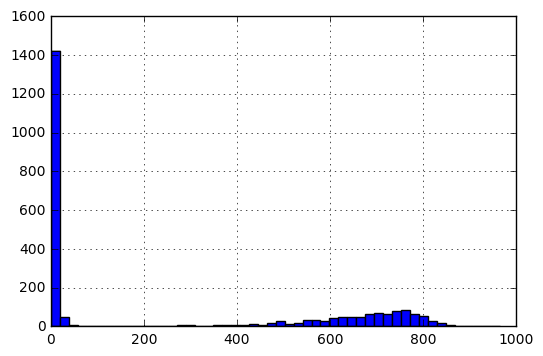

In [54]:
s.hist(bins=50)

In [55]:
c = Counter(s)

In [56]:
s.describe()

count    2461.000000
mean      264.912637
std       330.734505
min         1.000000
25%         2.000000
50%         8.000000
75%       645.000000
max       965.000000
dtype: float64

# Edge weights distribution

In [57]:
l = []

In [58]:
for e in G.edges():
    l.append(G.get_edge_data(e[0],e[1]).get("weight"))

In [59]:
edge_weights = Series(l)

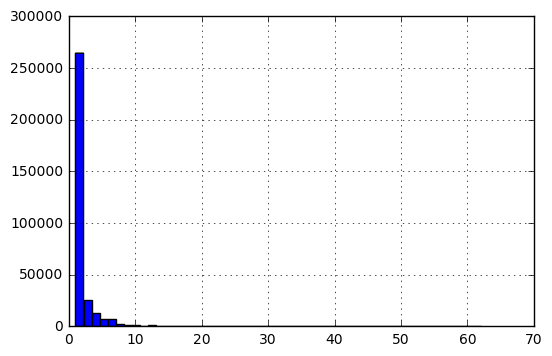

In [60]:
edge_weights.hist(bins=50)

In [61]:
edge_weights.describe()

count    325975.000000
mean          1.962700
std           2.209585
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          62.000000
dtype: float64

In [62]:
ew = Counter(edge_weights)

## Remove edges with weight 1

In [63]:
G1 = G.copy()

In [64]:
for e in G1.edges():
    if (G1.get_edge_data(e[0],e[1]).get("weight") < 2):
        G1.remove_edge(e[0],e[1])


In [65]:
nx.info(G1)

'Name: \nType: Graph\nNumber of nodes: 2461\nNumber of edges: 125003\nAverage degree: 101.5872'

In [66]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 2461\nNumber of edges: 325975\nAverage degree: 264.9126'

In [20]:
# nx.write_graphml(G1,"1day20150822_0.95conf_160dist_3ilen_filtered.graphml")

## Global structure (network level metrics)

- [X] number of components (size distribution of components)
- [X] diameter (for biggest component!)
- [X] size of biggest component
- [X] size - nodes and edges


- [X] density
- [X] mean/average degree
- [X] degree distribution
- [X] global clustering coefficient (also for biggest component)


- [X] average path length

### Number of components and size distribution

In [67]:
# only for biggest subgraph
Gcc = sorted(nx.connected_component_subgraphs(G1), key = len, reverse=True)
print("Number of components: {}".format(len(Gcc)))

size_components = []
for comp in Gcc:
    size_components.append(nx.number_of_nodes(comp))
    
Counter(list(size_components))

Number of components: 964


Counter({1: 963, 1498: 1})

There is one big component!

### Diameter for biggest component

In [70]:
G0 = Gcc[0]
diameter = nx.diameter(G0)
print("Diameter: {}".format(diameter))

Diameter: 4


### Nodes and Edges for biggest component

In [71]:
g0n = nx.number_of_nodes(G0)
g0e = nx.number_of_edges(G0)
print("Number of nodes: {}".format(g0n))
print("Number of edges: {}".format(g0e))

Number of nodes: 1498
Number of edges: 125003


In [74]:
g1n = nx.number_of_nodes(G1)
g1e = nx.number_of_edges(G1)
print("Number of nodes: {}".format(nodes))
print("Number of edges: {}".format(edges))

Number of nodes: 2461
Number of edges: 125003


### Density (biggest component)

In [73]:
density = nx.density(G0)
print("Density: {}".format(density))

Density: 0.11148509747577041


### Average Degree

In [75]:
degrees = G0.degree().values()
average_degree = sum(degrees)/g0n
print("Average degree: {}".format(average_degree))

Average degree: 166.8931909212283


### Degree Distribution (of biggest component)

In [76]:
degree_distribution = Series(list(degrees))

In [ ]:
ax = degree_distribution.hist(bins=50)
# ax.set_yscale('log')

In [78]:
degree_distribution.describe()

count    1498.000000
mean      166.893191
std       129.616904
min         1.000000
25%         3.000000
50%       217.000000
75%       283.750000
max       378.000000
dtype: float64

### global clustering coefficient

In [79]:
cc = nx.average_clustering(G1)
cc0 = nx.average_clustering(G0)
print("CC: {}".format(cc))
print("CC biggest component: {}".format(cc0))

CC: 0.16682849836243335
CC biggest component: 0.27407539016685495


### Average shortest path length

In [80]:
average_shortest_path = nx.average_shortest_path_length(G0)

In [81]:
print("Average shortest path: {}".format(average_shortest_path))

Average shortest path: 2.3117378504226966


## Was habe ich nun davon?
Jetzt kommen hier irgendwelche Werte raus. Was mach ich mit denen?
Ich müsste die ja mit irgendwas vergleichen. Ich könnte die zum Beispiel mit anderen Studien vergleichen.


### Density
*Mersch - Ameisen*

Die haben eine Density von 0.75 (dannach wurden dann edges entfernt um besser die Communities zu finden).
Hier ist die Density bei 0.1, bevor ich edges entfernt habe mit kleiner als 2 edge weight. So was sagt das jetzt. Ameisen reden mit allen Ameisen, Bienen wohl anscheinende nicht. Aber Achtung Achtung, verschieden konstruierte Netzwerke lassen sich nur beschränkt vergleichen. Obwohl ich jetzt davon aus gehen würde das das hier ok ist, da meine proximity eigentlich mehr umfassen müsste als Merschs-Interaktions-Ding.

*Baracchi - Honey Bees*

0.15, very low, compared to random network with same number of nodes and ties (What???? verstehe ich nicht). Hm.
Also in dem Bereich bewege ich mich ja anscheinend auch. Das ist ja nett. Haben beide eine Ähnliche definition von interaktion/proximity verwendet.


### Vorschlag von TU Menschen from long long ago

Comparison with:
* A) natural bees Networks (if we can find in the literature)
* B) Random geometric graphs (die sehen ganz passend aus irgendwie)
* C) mammals networks, e.g. Dolphins (warum würde man das machen wollen?)

## Mit Random Graph vergleichen?
Wenn ich da wieder drüber nachdenke, dann kann man sich ja einen random graph erzeugen, man hat eine große Auswahl: https://graph-tool.skewed.de/static/doc/generation.html oder http://networkx.readthedocs.io/en/stable/reference/generators.html und dann kann man die Netwerkeigenschaften untereinander vergleichen. Was bringt das denn? Warum sollte ich das machen wollen? Das würde ich doch nur machen wollen, wenn ich etwas bestimmtes zeigen möchte oder? Ich habe keine Ahnung was ich hier mit machen soll!

## Is it a real network? Or created by chance? Does it make a difference?
* degree distribution (not biniminal/poisson) - ja sieht nicht binominalverteilt aus, sieht ziemlich nach scale free, wenige hubs, viele knote mit wenig links
* connectedness (giant component) - ja sieht ziemlich verbunden aus alles, gibt nur eine große komponente
* average path length (~diameter) - ist hier auch ziemlich klein, Small-world phenomenon, $d = \frac{\ln nodes}{\ln av degree}$
* clustering coefficient - müsste höher sein als bei einem random network, jep ist es auch

In [89]:
random_g0 = nx.erdos_renyi_graph(n=nx.number_of_nodes(G0), p=density)

In [90]:
nx.info(random_g0)

'Name: gnp_random_graph(1498,0.11148509747577041)\nType: Graph\nNumber of nodes: 1498\nNumber of edges: 125148\nAverage degree: 167.0868'

In [91]:
nx.number_of_edges(G0)

125003

In [92]:
nx.average_clustering(random_g0)

0.11170937857183524

In [93]:
nx.average_clustering(G0)

0.27407539016685495

So was hat man nun davon, man weiß jetzt das genau dieses Netzwerk kein random Netzwerk ist. Jetzt weiß ich es ist ein echtes Netzwerk. Scale-free, small world. D.h, wenn man jetzt eine bestimmte Eigenschaft des echten Netzwerks untersucht, dann kann man diese auch im random Netzwerk untersuchen. Gibt es die dort auch, dann ensteht es durch zufall, wenn nicht, dann ist dies Eigenschaft durch irgendwas entstanden. Was bringt einem das was??? Das sind reine Netwerkeigenscahften, das hat nichts mit den Eigenschaften/Verhalten von Bienen zu tun.

## Local structure (node level metrics)
- [ ] node degree
- [ ] centrality measures (degree, closeness, betweenness, eigenvector)
- [ ] edge weights

In [3]:
import graph_tool as gt

ImportError: dlopen(/usr/local/lib/python2.7/site-packages/graph_tool/libgraph_tool_core.so, 8): Library not loaded: /usr/local/opt/boost-python/lib/libboost_python.dylib
  Referenced from: /usr/local/lib/python2.7/site-packages/graph_tool/libgraph_tool_core.so
  Reason: image not found

In [ ]:
p = "../1day20150822_0.95conf_160dist_3ilen_filtered.graphml"

## Community detection
- [ ] cliques
- [ ] communities